## Seach for mug with the Canny

In [ ]:
import cv2
import matplotlib

from matplotlib import pyplot as plt

In [ ]:
import numpy as np


In [ ]:
matplotlib.rcParams['figure.figsize'] = (20, 10)

In [ ]:
image = cv2.imread('/content/IMG_2820.jpeg')

In [ ]:
image.shape

(4032, 3024, 3)

In [ ]:
image = cv2.resize(image, (480, 640))

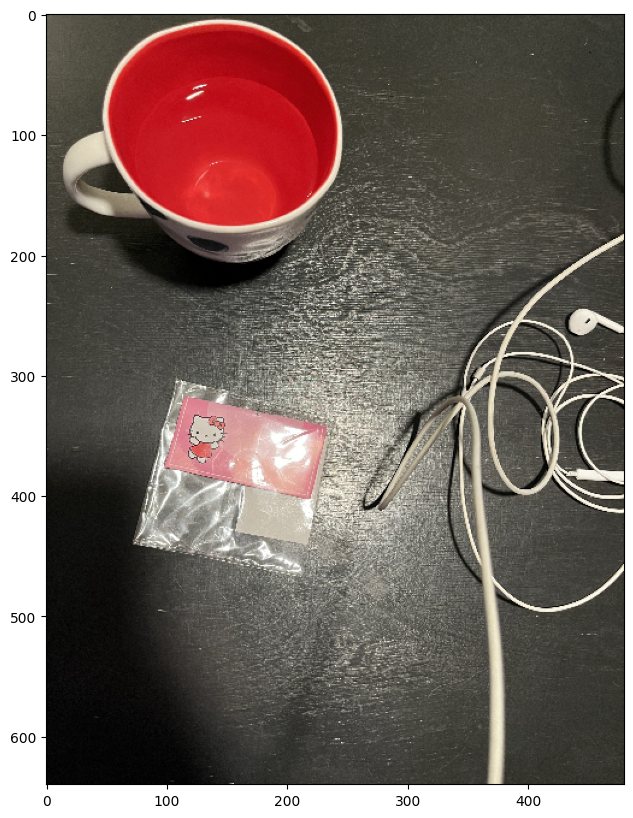

In [ ]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

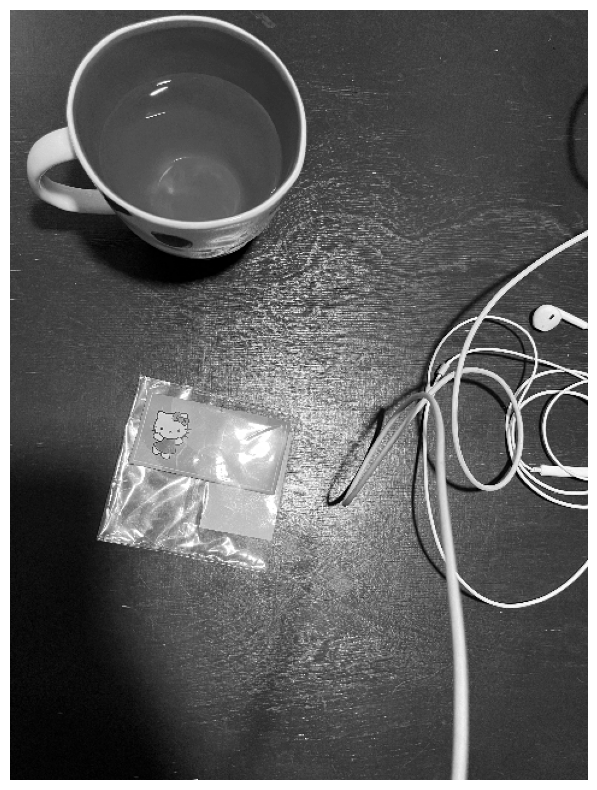

In [ ]:
# Switch to Black and White
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

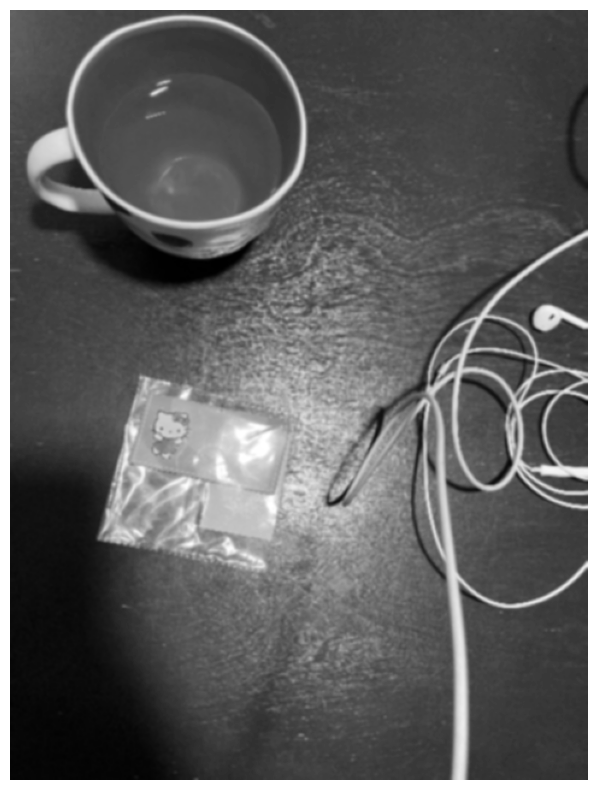

In [ ]:
gray_blurred = cv2.GaussianBlur(gray, (5, 5), 0)

plt.imshow(gray_blurred, cmap='gray')
plt.axis('off')
plt.show()

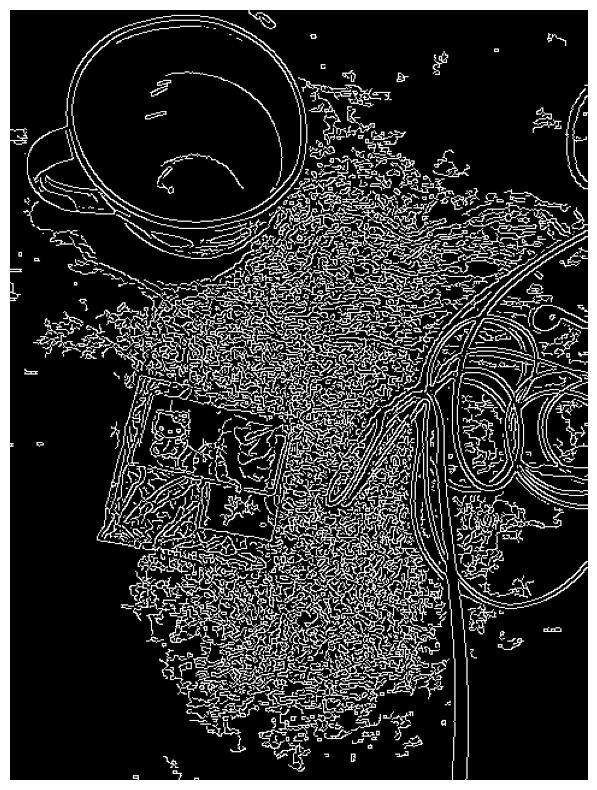

In [ ]:
edged = cv2.Canny(gray_blurred, 10, 50)
plt.imshow(edged, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# Outline contours

cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]
cnts[1]


array([[[102, 637]],

       [[103, 636]],

       [[105, 636]],

       [[106, 637]],

       [[105, 638]],

       [[103, 638]]], dtype=int32)

In [ ]:
# Now we need to find such contours that are approximated by a quadrangle

cnts = sorted(cnts,
              key = cv2.contourArea, # copmare function
              reverse = True)

solution = None
for c in cnts:
    # Calculate the permmeter to set the error
    peri = cv2.arcLength(c, True)
    # сalculate the approximation
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    if len(approx) == 4:
        solution = approx
        break

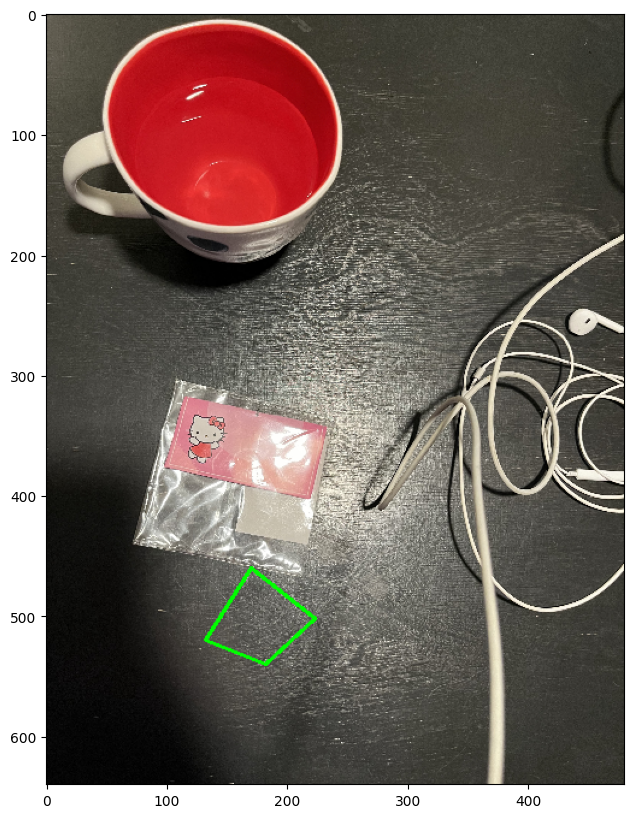

In [ ]:
image_to_draw = image.copy()
cv2.drawContours(image_to_draw, [solution], -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(image_to_draw, cv2.COLOR_BGR2RGB))

In [ ]:
solution = None
for c in cnts:

    (x, y), radius = cv2.minEnclosingCircle(c)
    circle_area = np.pi * (radius ** 2)
    contour_area = cv2.contourArea(c)

    if contour_area / circle_area > 0.8:
        solution = c
        break

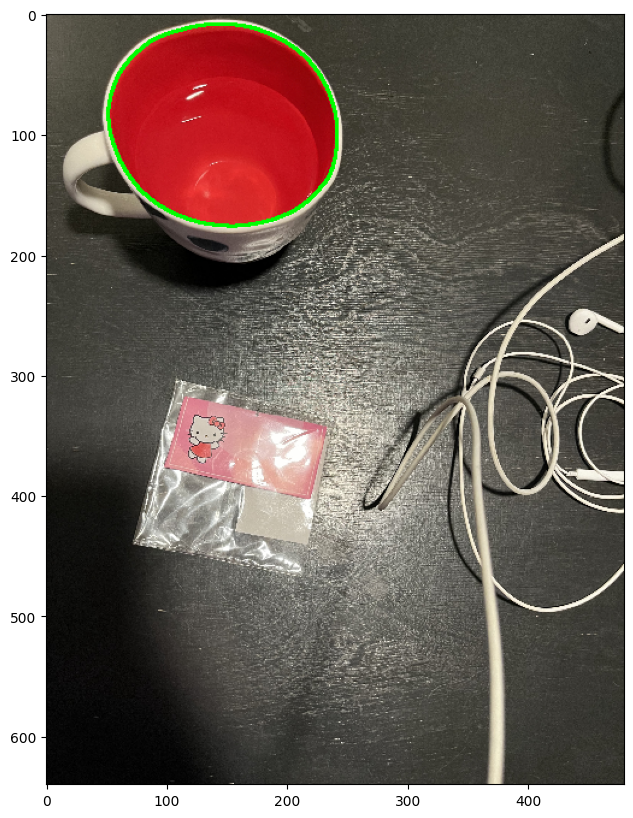

In [ ]:
image_to_draw = image.copy()
cv2.drawContours(image_to_draw, [solution], -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(image_to_draw, cv2.COLOR_BGR2RGB))